#### Task Description:
Train a ML method to recognize Fe deficiency based on the different hyperspectral spectra (i.e., measuring leaf reflectance at different wavelengths in the range of 400 to 1000 nm).
- In the TXT file, you will find an experiment conducted on four different species (Cs = Cucumber, Sl = Tomato, Zm = Maize, Hv = Barley) grown under Fe-deficient conditions.
- Each row refers to a different plant, while the columns indicate the values at various wavelengths of the reflectance spectrum (from 400 to 1000 nm).
- The second column contains the plant species information ("Species": Cs is cucumber, Zm is maize, Sl is tomato, Hv is barley).
- The third column contains the treatment information ("Thesis": +N-Fe indicates iron deficiency, +N+Fe indicates iron sufficiency).

#### Methods
- Logistic Regression (Linear)
- Logistic Regression (Polynomial)
- Random Forest

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

#### Load and Preprocess
- Drop the 'Leaf' column as it provides no classification information (it has the same value 'YL' for all rows)
- Encode the 'Thesis' column (the ground-truth label)
- Separate the dataset into features and labels
- check class imbalance 1) in the whole dataset 2) per each plant
- Check for missing values in the entire DataFrame (There was none)
- Identify outliers using the IQR method ---> <font color=red> NOT SURE. Do I drop them? </font>
- Feature selection - Get feature importances using Random Forest ---> <font color=red> NOT SURE. Do I drop them? They are 165 !</font>
- Scale the feature values (Columns here)

Class Distribution:
Thesis
+N+Fe    72
+N-Fe    72
Name: count, dtype: int64


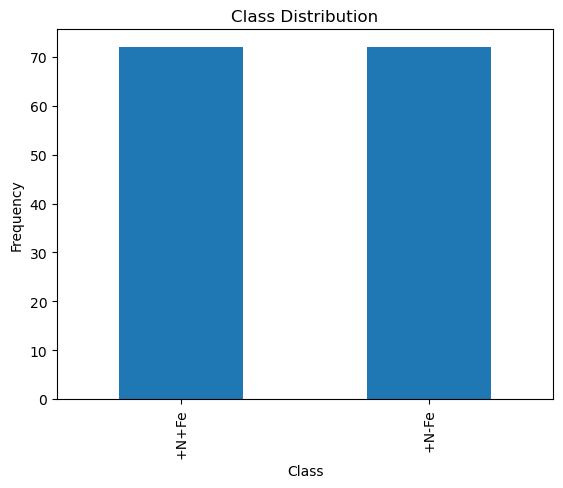

Columns with missing values: []

Outlier records/rows in the dataset:
Row numbers of outliers: [ 30  31  32  33  34  35  91  92  93  94  95  96  97  98  99 101 104 105
 106 107 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143]

Number of features with 0.0 importance: 165
Features with 0.0 importance: ['X397.32', 'X403.09', 'X405.97', 'X408.85', 'X411.74', 'X414.63', 'X417.52', 'X423.29', 'X426.19', 'X431.97', 'X434.87', 'X437.76', 'X440.66', 'X443.56', 'X446.45', 'X449.35', 'X452.25', 'X455.16', 'X458.06', 'X460.96', 'X463.87', 'X466.77', 'X469.68', 'X472.59', 'X475.50', 'X478.41', 'X481.32', 'X484.23', 'X487.14', 'X490.06', 'X492.97', 'X495.89', 'X498.80', 'X501.72', 'X504.64', 'X507.56', 'X510.48', 'X513.40', 'X516.33', 'X519.25', 'X525.10', 'X528.03', 'X530.96', 'X536.82', 'X539.75', 'X542.68', 'X545.62', 'X548.55', 'X551.49', 'X557.36', 'X560.30', 'X563.24', 'X572.07', 'X577.96', 'X586.80', 'X592.70', 'X595.65', 'X601.55', 'X604.51', 'X607.46', 'X610.42', 'X

In [69]:
# Step 1: Load the dataset
data = pd.read_csv('Dati_HIS_Serra_Cs_Hv_Sl_Zm_no_Fe.txt', delimiter='\t')
# Step 2: Preprocess the data
# Drop the 'leaf' column
data = data.drop(columns=['Leaf'])
# Separate the dataset into features and labels
X = data.iloc[:, 3:]
y = data['Thesis']

# Check the distribution/imbalance of the target variable
class_distribution = data['Thesis'].value_counts()
# Print the class distribution
print("Class Distribution:")
print(class_distribution)
# Visualize the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Encode the 'Thesis' column
le = LabelEncoder()
y = le.fit_transform(y)

# Check for missing values --> none
print(f"Columns with missing values: {data.columns[data.isnull().any()].tolist()}")
# IQR (identify rows where at least one feature (column) has an outlier)------------------>??
print("\nOutlier records/rows in the dataset:")
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
# Print row numbers of the outliers
outlier_rows = np.where(outliers)[0]
print("Row numbers of outliers:", outlier_rows)
# print(X[outliers])

# Feature selection ------------------>??
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# Count the number of features with 0.0 importance and print their names
zero_importance_features = feature_importances[feature_importances == 0.0].index.tolist()
print(f"\nNumber of features with 0.0 importance: {len(zero_importance_features)}")
print("Features with 0.0 importance:", zero_importance_features)
# print("\nFeature Importances:")
# print(feature_importances.sort_values(ascending=False))
# Remove zero importance features from X
# X_reduced = X.drop(columns=zero_importance_features)
# print("\nX_reduced.shape is ", X_reduced.shape)

#Scale the feature/columns values
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_reduced)
X_scaled = scaler.fit_transform(X)


# # Apply PCA for further dimensionality reduction
# pca = PCA(n_components=10)  # Adjust n_components to retain desired variance
# X_pca = pca.fit_transform(X_scaled)
# print("\nExplained variance by each principal component:", pca.explained_variance_ratio_)

### <font color=red> Disputed Cell! </font>
The following cell is related to "train & test" split which is under discussion
- Plan A: Blindly trust "train_test_split()" function
- Plan B: Manually, decompose the dataset based on plant type
- Plan C: ?!?

Class Distribution for Plant1:
0    18
1    18
Name: count, dtype: int64


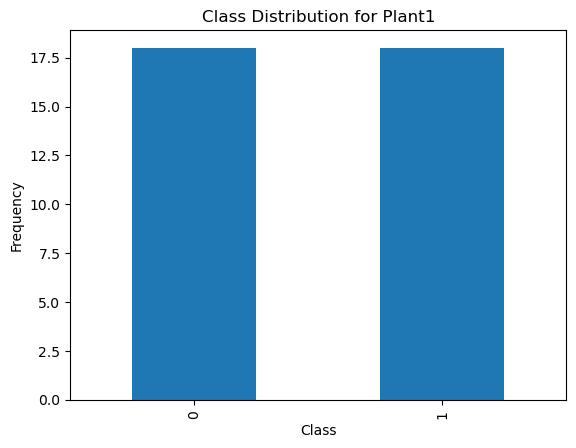

Plant1 - Features Shape: (36, 204), Target Shape: (36,)
distances_within_plant.shape is (36, 36)
distances_flat_within_plant.shape is (630,)
Plant1 - Mean Distance: 11.622363730558948, Std Distance: 5.792657736870235, Var Distance: 33.55488365652259


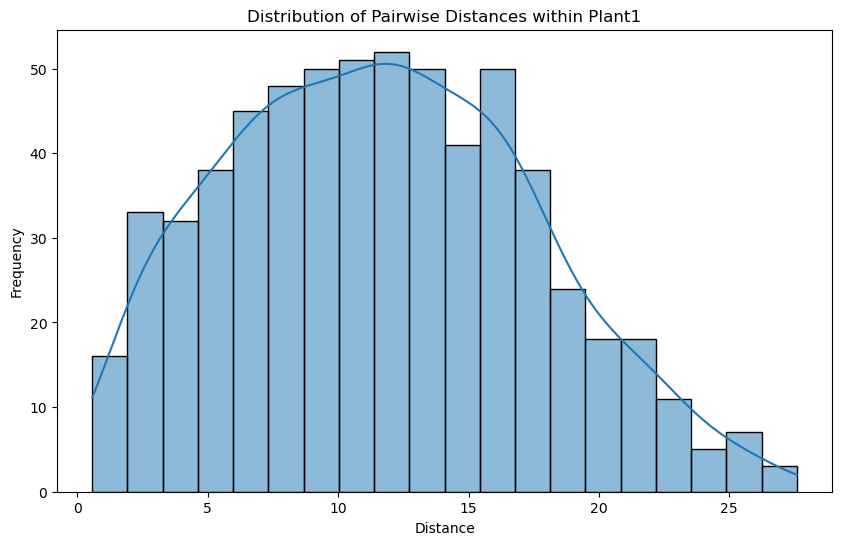

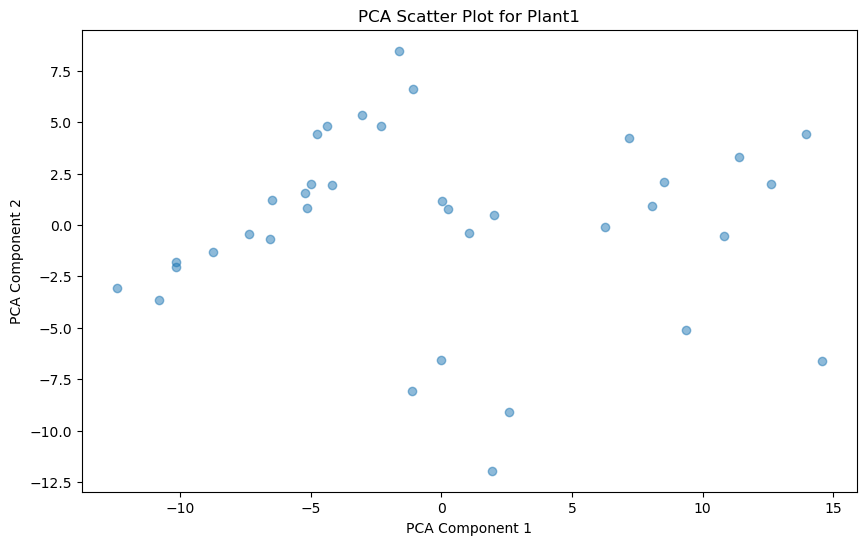

Class Distribution for Plant2:
0    18
1    18
Name: count, dtype: int64


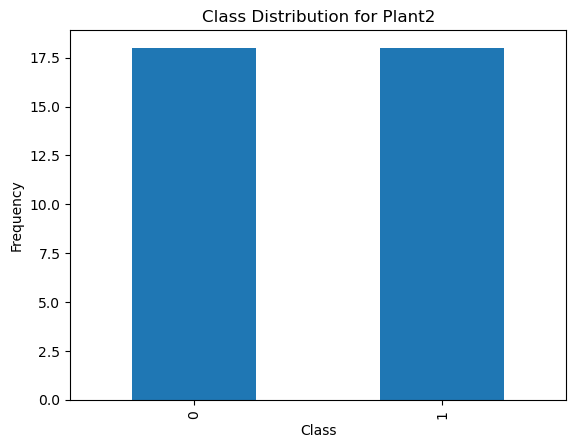

Plant2 - Features Shape: (36, 204), Target Shape: (36,)
distances_within_plant.shape is (36, 36)
distances_flat_within_plant.shape is (630,)
Plant2 - Mean Distance: 6.60389254021203, Std Distance: 4.075286795370299, Var Distance: 16.607962464519517


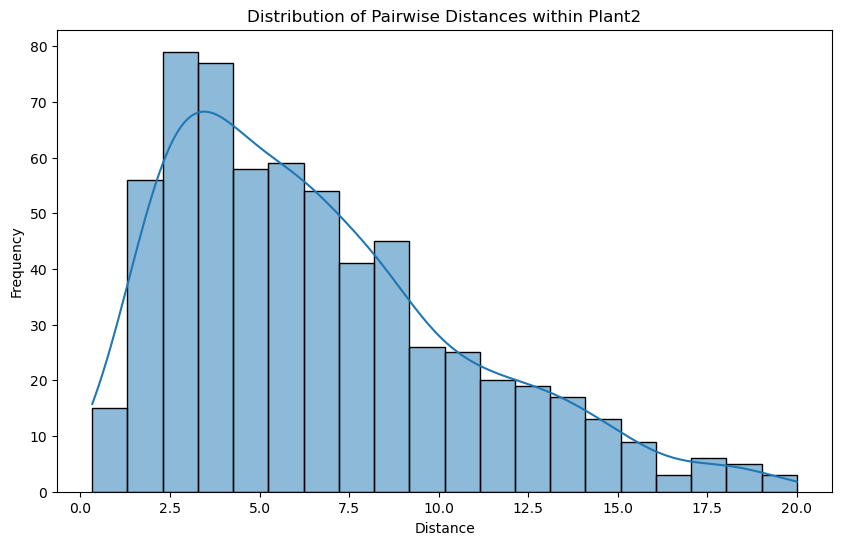

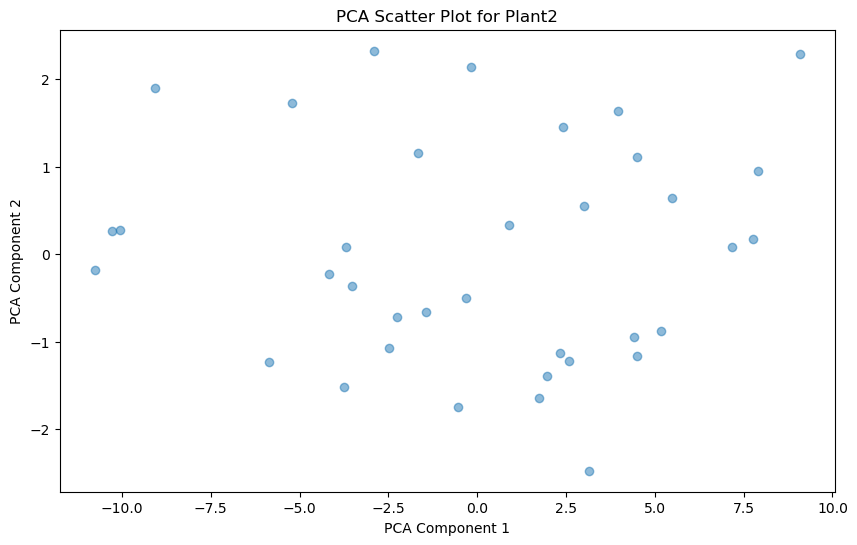

Class Distribution for Plant3:
0    18
1    18
Name: count, dtype: int64


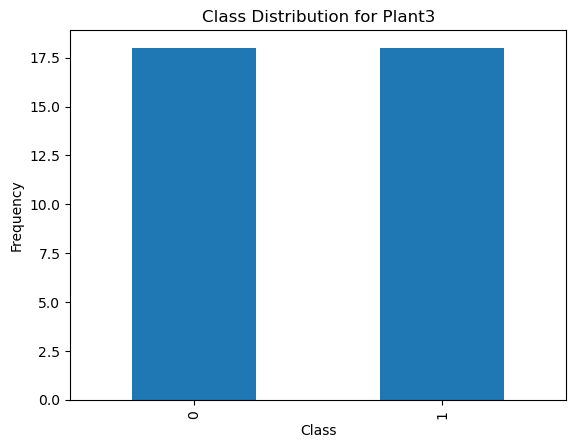

Plant3 - Features Shape: (36, 204), Target Shape: (36,)
distances_within_plant.shape is (36, 36)
distances_flat_within_plant.shape is (630,)
Plant3 - Mean Distance: 16.163994439912894, Std Distance: 9.347247673244073, Var Distance: 87.37103906496674


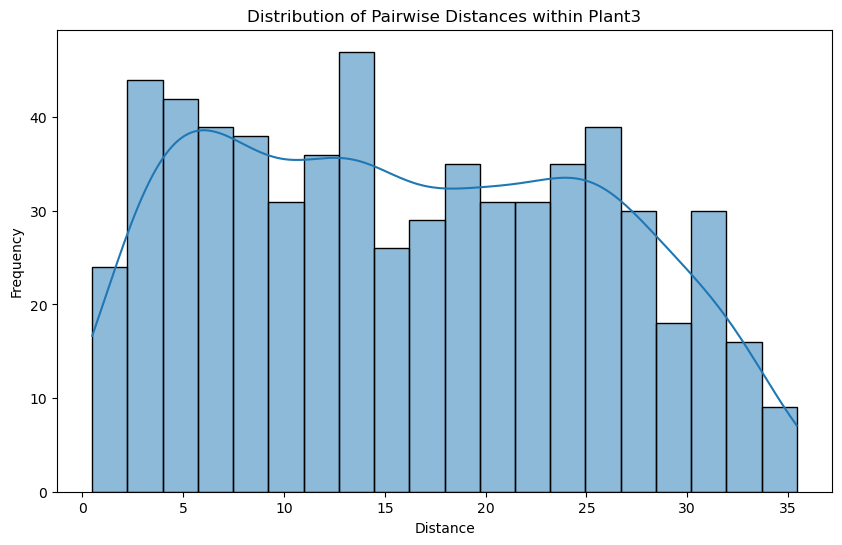

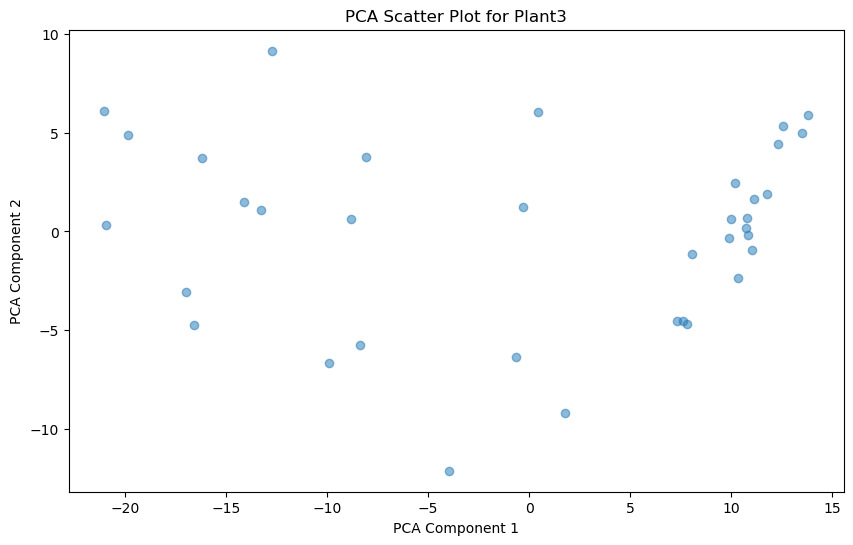

Class Distribution for Plant4:
0    18
1    18
Name: count, dtype: int64


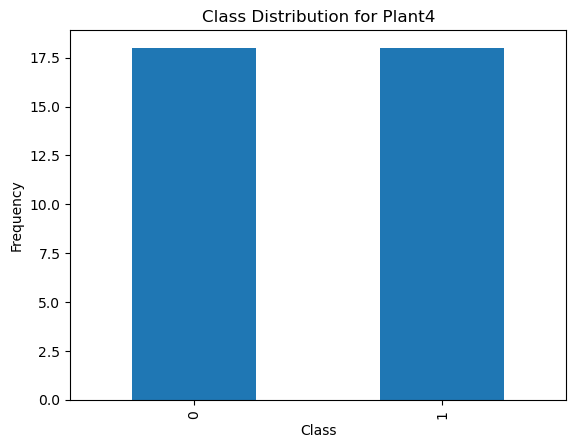

Plant4 - Features Shape: (36, 204), Target Shape: (36,)
distances_within_plant.shape is (36, 36)
distances_flat_within_plant.shape is (630,)
Plant4 - Mean Distance: 18.075956994266015, Std Distance: 9.929579355357008, Var Distance: 98.5965461743321


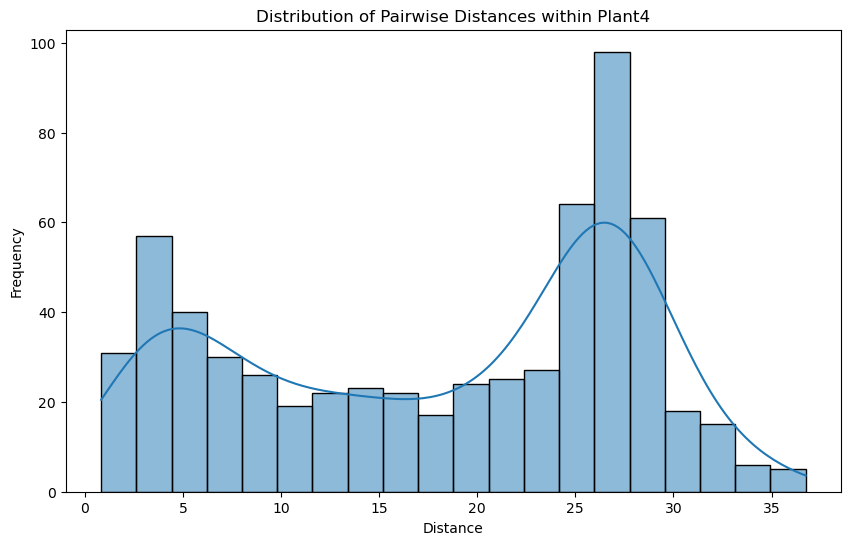

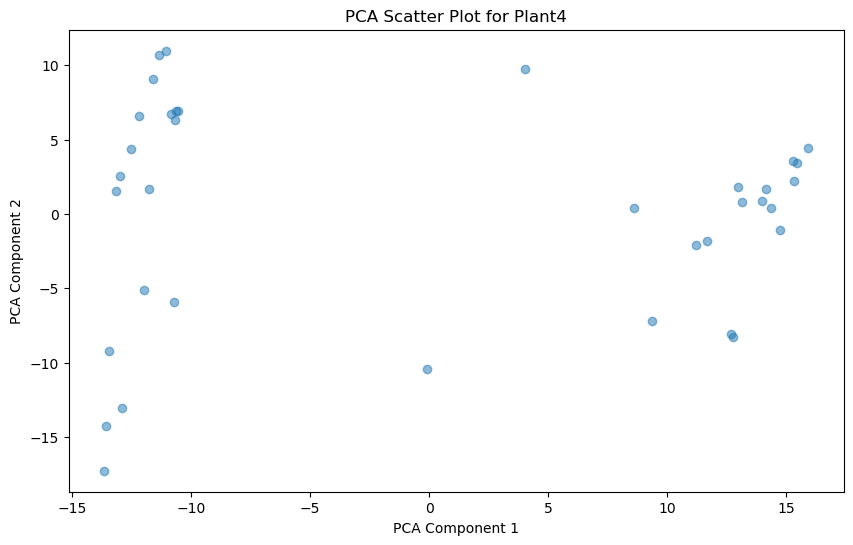

X_train shape: (108, 204), y_train shape: (108,)
X_test shape: (36, 204), y_test shape: (36,)
X_train shape: (108, 204), y_train shape: (108,)
X_test shape: (36, 204), y_test shape: (36,)


In [70]:
# Step 3: Train-Test Split

#Plan A
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)


# plan B
# Grouping the data by plant using X_scaled and y
plant_groups_scaled = {
    "Plant1": (X_scaled[0:36], y[0:36]),
    "Plant2": (X_scaled[36:72], y[36:72]),
    "Plant3": (X_scaled[72:108], y[72:108]),
    "Plant4": (X_scaled[108:144], y[108:144])
}


# Assess the Similarity of Data Points
for plant, group_data in plant_groups_scaled.items():
    # check Class Imabalance in each Plant
    class_distribution = pd.Series(group_data[1]).value_counts()
    print(f"Class Distribution for {plant}:")
    print(class_distribution)
    class_distribution.plot(kind='bar')
    plt.title(f'Class Distribution for {plant}')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

    plant_features = group_data[0]
    plant_target = group_data[1]
    print(f"{plant} - Features Shape: {plant_features.shape}, Target Shape: {plant_target.shape}")

    # Calculate pairwise distances within the plant
    distances_within_plant = euclidean_distances(plant_features)
    np.fill_diagonal(distances_within_plant, np.nan)
    
    # Flatten distances to analyze distribution
    distances_flat_within_plant = distances_within_plant[np.triu_indices_from(distances_within_plant, k=1)]
    print("distances_within_plant.shape is",distances_within_plant.shape)
    print("distances_flat_within_plant.shape is",distances_flat_within_plant.shape)
    # Statistical measures
    mean_distance = np.nanmean(distances_flat_within_plant)
    std_distance = np.nanstd(distances_flat_within_plant)
    var_distance = np.nanvar(distances_flat_within_plant)
    
    print(f"{plant} - Mean Distance: {mean_distance}, Std Distance: {std_distance}, Var Distance: {var_distance}")
    
    # Visualize histogram of distances within the plant
    plt.figure(figsize=(10, 6))
    sns.histplot(distances_flat_within_plant, bins=20, kde=True)
    plt.title(f'Distribution of Pairwise Distances within {plant}')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()
    
    # PCA Scatter Plot for feature relationships within the plant
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(plant_features)
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PCA Scatter Plot for {plant}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
# //////////////////////////////////////////////

# Plan B
# Concatenate the features and targets for Plants 1, 2, and 3 for the training set
X_train = np.concatenate([plant_groups_scaled["Plant1"][0], plant_groups_scaled["Plant2"][0], plant_groups_scaled["Plant3"][0]], axis=0)
y_train = np.concatenate([plant_groups_scaled["Plant1"][1], plant_groups_scaled["Plant2"][1], plant_groups_scaled["Plant3"][1]], axis=0)
# Use Plant 4 data for the test set
X_test = plant_groups_scaled["Plant4"][0]
y_test = plant_groups_scaled["Plant4"][1]
# Confirm the shape of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Plan C
# ...
# Confirm the shape of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


#### Hyperparameter Tuning Using GridSearchCV , Model Training, and Evaluation
- Linear Logistic Regression </font>
- Polynomial Logistic Regression </font>
- Randomforest


----> <font color=red> Explicit Crossfold Validation (in the evaluation) or in GridSearch (Hyperparameter tuning)?? </font> I did the 2nd.

#### <font color=green> Standard Logistic Regression </font>

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Cross-Validation Scores from GridSearchCV:
     mean_test_score  std_test_score  \
0          0.871861        0.165719   
1          0.806061        0.147171   
2          0.871861        0.165719   
3          0.926840        0.101933   
4          0.852381        0.145060   
5          0.926840        0.101933   
6          0.972727        0.036364   
7          0.926407        0.084510   
8          0.945022        0.066751   
9          0.981818        0.036364   
10         0.981818        0.036364   
11         0.972727        0.036364   
12         0.981818        0.036364   
13         0.981818        0.036364   
14         0.981818        0.036364   

                                               params  
0     {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}  
1   {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...  
2       {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}  
3      {'C': 0.1, '

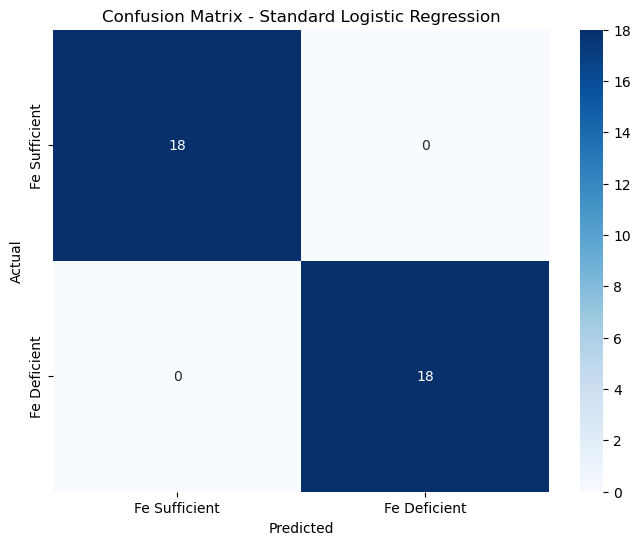

In [59]:
### Hyperparameter Tuning and Cross-Validation for Standard Logistic Regression ###
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 30],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}
random_state= 42
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, tol=1e-3,random_state=random_state), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
print("Best parameters for Logistic Regression:", best_params_lr)

# Print Cross-Validation Scores from GridSearchCV
cv_results = pd.DataFrame(grid_search_lr.cv_results_)
print("\nCross-Validation Scores from GridSearchCV:\n", cv_results[['mean_test_score', 'std_test_score', 'params']])

# Initialize the best logistic regression model
model = LogisticRegression(**best_params_lr, max_iter=5000, tol=1e-3, random_state=random_state)

# # Perform cross-validation
# cv_scores_lr = cross_val_score(model, X_train, y_train, cv=5)
# print("\nStandard Logistic Regression - Cross-Validation Scores:", cv_scores_lr)
# print("Mean Cross-Validation Score:", cv_scores_lr.mean())

# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation for Standard Logistic Regression
print("\nStandard Logistic Regression - Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fe Sufficient", "Fe Deficient"], yticklabels=["Fe Sufficient", "Fe Deficient"])
plt.title("Confusion Matrix - Standard Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




#### <font color=green> Polynomial Logistic Regression </font>

Best parameters for Polynomial Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Cross-Validation Scores from GridSearchCV:
     mean_test_score  std_test_score  \
0          0.890476        0.113306   
1          0.871429        0.087394   
2          0.871429        0.087394   
3          0.935931        0.067920   
4          0.917749        0.101080   
5          0.927273        0.106017   
6          0.972727        0.036364   
7          0.972294        0.036590   
8          0.954113        0.049800   
9          0.962771        0.045617   
10         0.934199        0.070943   
11         0.963203        0.034142   
12         0.943723        0.045977   
13         0.924675        0.071059   
14         0.963203        0.034142   

                                               params  
0     {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}  
1   {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...  
2       {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}  
3      {'

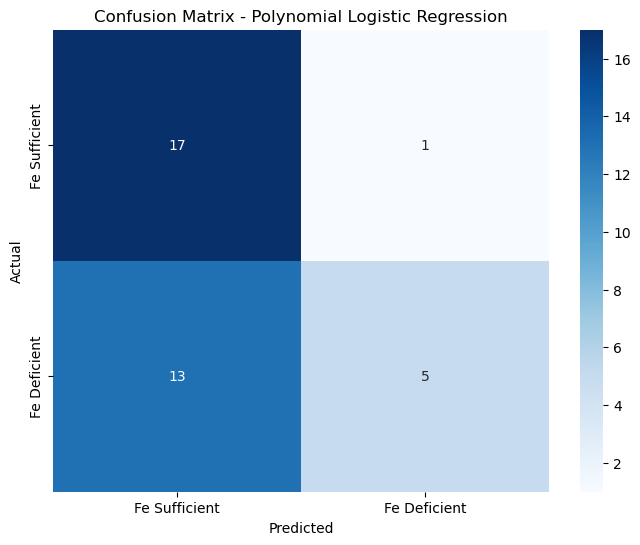

In [60]:
### Polynomial Logistic Regression ###
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Hyperparameter Tuning and Cross-Validation for Polynomial Logistic Regression
param_grid_poly = {
    'C': [0.01, 0.1, 1, 10, 30],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'sag']
}
random_state = 42
grid_search_poly = GridSearchCV(LogisticRegression(max_iter=1000, tol=1e-3, random_state=random_state), param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X_poly, y_train)
best_params_poly = grid_search_poly.best_params_
print("Best parameters for Polynomial Logistic Regression:", best_params_poly)

# Print Cross-Validation Scores from GridSearchCV
cv_results_poly = pd.DataFrame(grid_search_poly.cv_results_)
print("\nCross-Validation Scores from GridSearchCV:\n", cv_results_poly[['mean_test_score', 'std_test_score', 'params']])

# Initialize the best polynomial logistic regression model
model_poly = LogisticRegression(**best_params_poly,max_iter=5000, tol=1e-3,random_state=random_state)

# Train the model on the entire training set
model_poly.fit(X_poly, y_train)

# Make predictions on the test set
y_pred_poly = model_poly.predict(poly.transform(X_test))

# Model Evaluation for Polynomial Logistic Regression
print("\nPolynomial Logistic Regression - Test Set Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_poly))

# Confusion Matrix
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="Blues", xticklabels=["Fe Sufficient", "Fe Deficient"], yticklabels=["Fe Sufficient", "Fe Deficient"])
plt.title("Confusion Matrix - Polynomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### <font color=green> Random Forest </font>

C:\Users\hassa\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Cross-Validation Scores from GridSearchCV:
      mean_test_score  std_test_score  \
0           0.972727        0.036364   
1           0.981818        0.036364   
2           0.981818        0.036364   
3           0.981818        0.036364   
4           0.963636        0.053009   
..               ...             ...   
283         0.972727        0.036364   
284         0.972727        0.036364   
285         0.963636        0.044536   
286         0.972727        0.036364   
287         0.972727        0.036364   

                                                params  
0    {'max_depth': None, 'max_features': 'sqrt', 'm...  
1    {'max_depth': None, 'max_features': 'sqrt', 'm...  
2    {'max_depth': None, 'max_features': 'sqrt', 'm...  
3    {'max_depth': None, 'max_features': 'sqrt', 'm...  
4    {'max_depth': None, 'max_features': 's

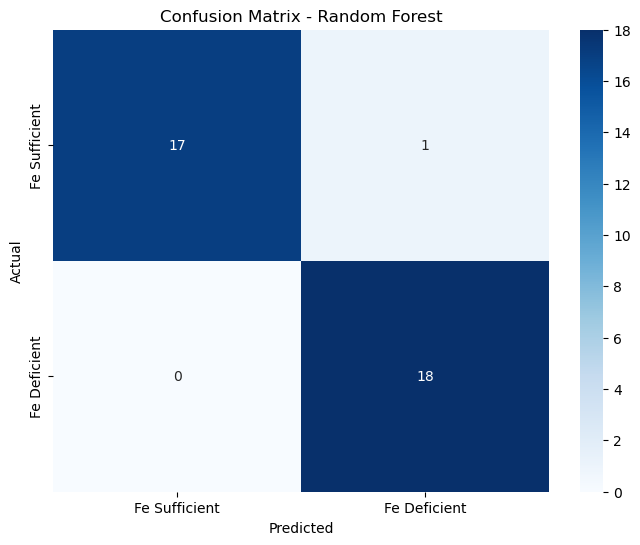

In [61]:
### Random Forest Classifier ###
# Hyperparameter Tuning and Cross-Validation for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Set a random_state for reproducibility
random_state = 42
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Print Cross-Validation Scores from GridSearchCV
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
print("\nCross-Validation Scores from GridSearchCV:\n", cv_results_rf[['mean_test_score', 'std_test_score', 'params']])

# Initialize the best Random Forest model
rf_model = RandomForestClassifier(**best_params_rf,random_state=random_state)

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation for Random Forest
print("\nRandom Forest - Test Set Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Fe Sufficient", "Fe Deficient"], yticklabels=["Fe Sufficient", "Fe Deficient"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()